# Logistic Regression

*Author: Dr. Vasile Rus (vrus@memphis.edu)*

Logistic regression is a supervised Data Science method typically used for **classification/categorization** tasks such as the example categorizations given below:
* categorize a person as having diabetes or not having diabetes
* categorize an incoming email as spam or not spam

It can also be viewed as expressing a relationship between an outcome/dependent variable (the category/class of the object) and the predictor/independent variables (the object’s characteristics/features)

Based on the number of categories of the output/dependent variable, we have
* Binary/binomial logistic regression
* Multiclass/Multinomial logistic regression
* Ordinal logistic regression (there is an order among the categories)

**What is classification?**

A classification/categorization task is about placing an object, e.g., a patient, into one of many categories, e.g. diseases, based on some characteristics of that object, e.g, patient’s symptoms.

Depending on the number of classes/categories, classification tasks are called:
* Binary/binomial vs. multi-class/multinomial classification. The simplest form of classification is binary classification, e.g., spam vs. not-spam email.
* Multinomial classification. An example is categorizing birds into one of many species.

**Hard classification vs. soft classification**
* Hard classification: The object is placed into one and only one category out of many
* Soft classification: the object is assigned to more than one category with some measure indicating the confidence of that object belonging to those categories

In this notebook, we focus on binary, hard classification tasks.

## Mathematical Foundations of Logistic Regression for Binary, Hard Classification

We briefly review in this section the mathematical formulation of logistic regression for binary, hard classification problems. That is, the predicted categories are just two (say, 1 or 0) and each object or instance belongs to one and only one category. 

Logistic regression expresses the relationship between the output variable, also called dependent variable, and the predictors, also called independent variables or features, in a similar way to linear regression with an additional twist. The additional twist is necessary in order to transform the typical continuous value of linear regression onto a categorical value (0 or 1).

**From Linear Regression to Logistic Regression**

Let us review first the basics of linear regression and then discuss how to transform the mathematical formulation of linear regression such that the outcome is categorical. 

In a typical linear regression equation, the output variable $Y$ is related to the predictor variables $X_j$ ($j=1,n$), i.e., we have n pedictor variables in this case) using the following linear relation, i.e., the output $Y$ is a linear combination of the predictors $X_j$ with corresponding weights (or coefficients) $\beta_{j}$:

$$Y = {\beta}_{0} + \sum \limits _{j=1} ^{p} X_{j}{\beta}_{j}$$

In linear regression, the output $Y$ has continuous values between $-\inf$ and $+\inf$. In order to map such output values to just 0 and 1, we need to apply the sigmoid or logistic function.

$$\sigma (t) = \frac{1}{1 + e^{-t}}$$

A graphical representation of the sigmoid or logistic function is shown below (from Wikipedia). The important part is that the output values are in the interval $(0,1)$ which is cloase to our goal of just predicted values 1 or 0.

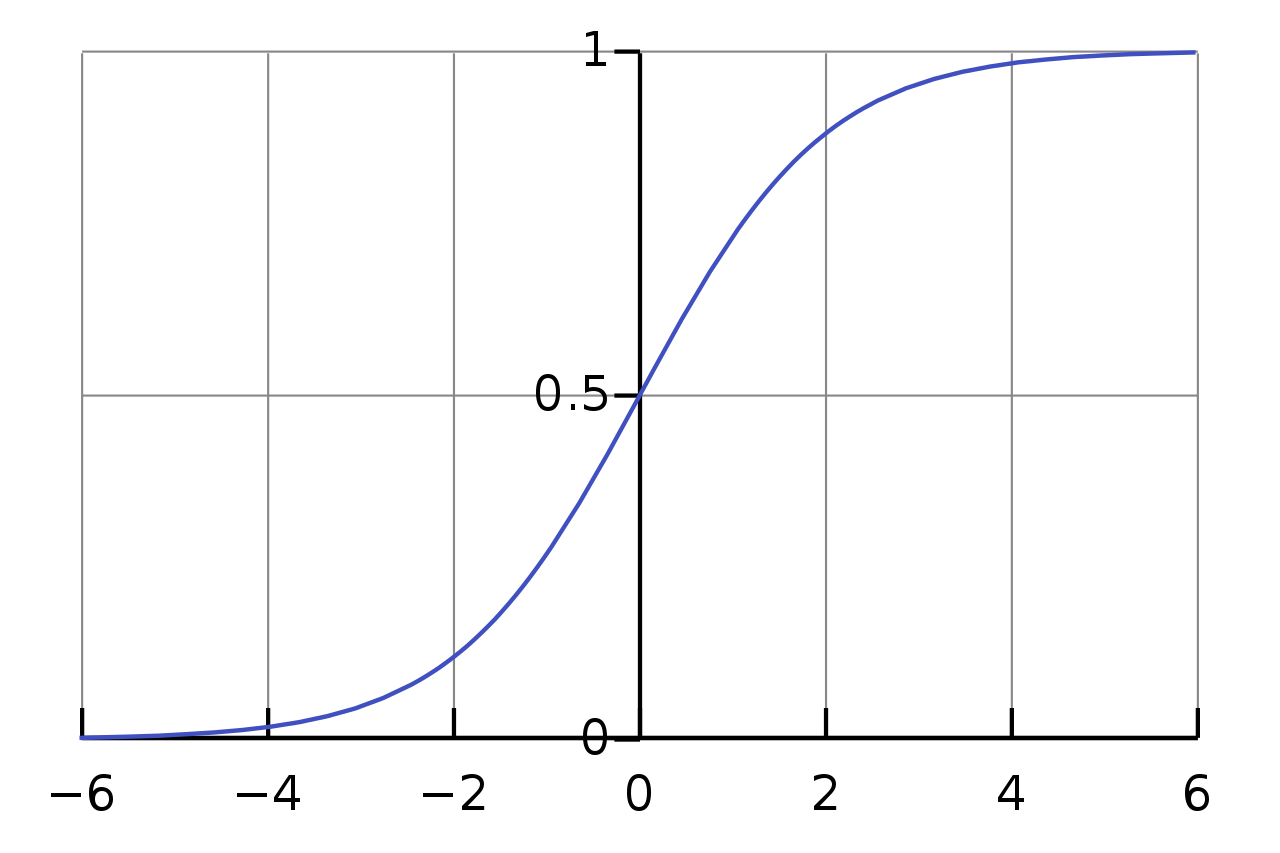

When applied to the $Y = {\beta}_{0} + \sum \limits _{j=1} ^{p} X_{j}{\beta}_{j}$ from linear regression we get the following formulation for logistic regression:
$$\frac{1}{1 + e^{{\beta}_{0} + \sum \limits _{j=1} ^{p} X_{j}{\beta}_{j}}}$$

The net effect is that the the typical linear regression output values ranging from $-\inf$ and $+\inf$ are now bound to $(0,1)$, which is typical for probabilities. That is, the above formulation can be interpreted as estimating the probability of instance $X$ (described by all predictors $X_j$) belonging to class 1. 

$$ P( Y=1 | X ) = \frac{1}{1 + e^{{\beta}_{0} + \sum \limits _{j=1} ^{p} X_{j}{\beta}_{j}}}$$

The probability of class 0 is then:

$$ P( Y=0 | X ) = 1 - P( Y=1 | X ) $$

Values close to 0 are deemed to belong to class 0 and values close to 1 are deemed to belong to class 1 thus resulting in a categorical output which is what we intend in logistic regression.

# Supervised Training for Logistic Regression

In order to apply logistic regression to a particular problem, e.g., email spam classification, we need to train a logistic regression model using a supervised method, i.e., we need a training dataset consisting of expert-labeled instances of the objects we want to classify and their correct categories as judged by human experts.

During training, the best set of predictor variable weights or coefficients $\beta_{j}$ are estimated based on the training data. It is beyond the scope of this notebook to detail the details of the training process. We will just note that the objective is to find the weights that maximize how well the predicted categories match the true, actual/expert-labelled categories for all instances.

Mathematically, the goal of the training is to maximize the following expression that captures how well a set of the values of the coefficients $\beta_{j}$, i.e., a logistic model, predicts the actual classes for all training instances T:

$$Likelihood(T) = \prod _{j=1} ^{T} P(Y_{j}|X_{j}; \beta_{j})$$

The expression is called the likelihood of the training data $T$ and is defined as the product of the estimated probabilities of each training example $X_j$ given a model defined by the weights/coefficients $\beta_{j}$. For computational reasons (e.g., it is easier to work with sum of small numbers than with products of such small numbers, i.e., probabilities values between 0 and 1), we maximize the log of likelihood:

$$Log-Likelihood(T) = log (\prod _{j=1} ^{T} P(Y_{j}|X_{j}; \beta_{j})) = \sum _{j=1} ^{T} P(Y_{j}|X_{j}; \beta_{j})$$

The probability of an instance labeled with class $Y_i$ is in compact form: 

$$ P(Y_{j}|X_{j}; \beta_{j}) = P(Y_{j}=1|X_{j}; \beta_{j})^{Y_j} (1- P(Y_{j}=1|X_{j}; \beta_{j})^{(1-Y_j)}$$

Based on this expression of the probability of each instance, we can rewrite the log-likelihood as:

$$Log-Likelihood(T) = \sum _{j=1} ^{T} {P(Y_{j}=1|X_{j}; \beta_{j})^{Y_j}} + \sum _{j=1} ^{T} {(1- P(Y_{j}=1|X_{j}; \beta_{j})^{(1-Y_j)}}$$

During training this expression is maximized. It can be maximized by minimizing its opposite which we can call the cost function or optimization objective for logistic regression:

$$cost-function = - Log-Likelihood(T) = - \sum _{j=1} ^{T} {P(Y_{j}=1|X_{j}; \beta_{j})^{Y_j}} - \sum _{j=1} ^{T} {(1- P(Y_{j}=1|X_{j}; \beta_{j})^{(1-Y_j)}}$$

Finding the weights or coefficients $beta_{j}$ that minimize the cost function can be done using various algorithms such as gradient descent.

# Interpreting the Coefficients in Logistic Regression

One of the best ways to interpret the coefficients in logistic regression is to transform it back into a linear regression whose coefficients are easier to interpret. From the earlier formulattion, we know that:

$$ Y =  P( Y=1 | X ) = \frac{1}{1 + e^{{\beta}_{0} + \sum \limits _{j=1} ^{p} X_{j}{\beta}_{j}}}$$

Applying a log function on both sides, we get:

$$ log \frac{P ( Y=1 | X )}{1- P( Y=1 | X )} = \sum \limits _{j=1} ^{p}  X_{j}{\beta}_{j} $$

On the left-hand of the above expression we have the log odds defined as the ratio of the probability of class 1 versus the probability of class 0. Indeed, this expression $\frac{P ( Y=1 | X )}{1- P( Y=1 | X )}$ is the odds as $1- P( Y=1 | X )$ is the probability of class 0, i.e., $P( Y=0 | X )$.

Therefore, we conclude that the log odds are a linear regression of the predictor variables weighted by the coefficients $\beta_{j}$. Each such coefficient therefore indicates a change in the log odds when the corresponding predictor changes with a unit (in the case of numerical predictors).

# Peformance Evaluation for Classification Methods including Logistic Regression

The typical performance metrics for classifiers are accuracy, precision, and recall. These are typical derived by compared the predicted output to the golden or actual output/categories in the expert labelled dataset.

For a binary classification case, we denote the category 1 as the positive category and category 0 as the negative category. Using this new terminology, When comparing the predicted categories to the actual categories we may end up with the following cases:
* True Positives (TP): instances predicted as belonging to the positive category and which in fact do belong to the positive category
* True Negatives (TN): instances predicted as belonging to the negative category and which in fact do belong to the negative category
* False Positives (FP): instances predicted as belonging to the positive category and which in fact do belong to the negative category
* False Negatives (FN): instances predicted as belonging to the negative category and which in fact do belong to the positive category

From these categories, we define the following metrics:

$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$

$Precision = \frac{TP}{TP + FP}$

$Recall = \frac{TP}{TP + FN}$

Classfication methods that have a high accuracy are preferred in general although in some case maximizing precision or recall may be preferred. For instance, a high recall is highly recommended when making medical diagnosis since it is preferrable to err on mis-diagnosing someone as having cancer as opposed to missing someone who indeed has cancer, i.e., the method should try not to miss anyone who may indeed have cancer. 

In general, there is a trade-off between precision and recall. If precision is high then recall is low and viceversa. Total recall (100% recall) is achievable by always predicting the positive class, i.e., label all instances as positive, in which case precision will be very low.


# Example of Classification: Diabetes or no Diabetes
The type of dataset and problem is a classic supervised binary classification. Given a number of elements all with certain characteristics (features), we want to build a machine learning model to identify people affected by type 2 diabetes.

To solve the problem we will have to analyse the data, do any required transformation and normalisation, apply a machine learning algorithm, train a model, check the performance of the trained model and iterate with other algorithms until we find the most performant for our type of dataset.


## The Pima Indians Dataset

The Pima are a group of Native Americans living in Arizona. A genetic predisposition allowed this group to survive normally to a diet poor of carbohydrates for years. In the recent years, because of a sudden shift from traditional agricultural crops to processed foods, together with a decline in physical activity, made them develop the highest prevalence of type 2 diabetes and for this reason they have been subject of many studies.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.

## Dataset
The dataset includes data from 768 women with 8 characteristics, in particular:

Number of times pregnant
Plasma glucose concentration a 2 hours in an oral glucose tolerance test
Diastolic blood pressure (mm Hg)
Triceps skin fold thickness (mm)
2-Hour serum insulin (mu U/ml)
Body mass index (weight in kg/(height in m)^2)
Diabetes pedigree function
Age (years)
The last column of the dataset indicates if the person has been diagnosed with diabetes (1) or not (0)

*Source*
The original dataset is available at UCI Machine Learning Repository and can be downloaded from this address: http://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes
The link seems to not be active anymore.
As of May 2020, this source worked: https://gist.github.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f

---------------------------------------
Original below

The Pima are a group of Native Americans living in Arizona. 
A genetic predisposition allowed this group to survive normally to a diet poor of carbohydrates for years. 
In the recent years, because of a sudden shift from traditional agricultural crops to processed foods, together with a decline in physical activity, made them develop the highest prevalence of type 2 diabetes and for this reason they have been subject of many studies.
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.

### Dataset
 
 The dataset includes data from 768 women with 8 characteristics, in particular:

- Number of times pregnant
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Diastolic blood pressure (mm Hg)
- Triceps skin fold thickness (mm)
- 2-Hour serum insulin (mu U/ml)
- Body mass index (weight in kg/(height in m)^2)
- Diabetes pedigree function
- Age (years)
- The last column of the dataset indicates if the person has been diagnosed with diabetes (1) or not (0)

### Source

 The original dataset is available at UCI Machine Learning Repository and can be downloaded from [this address](http://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes).
 
 The link seems to not be active anymore.
 As of May 2020, this source worked: https://gist.github.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f

### The problem

 The type of dataset and problem is a classic supervised binary classification. 
 Given a number of elements all with certain characteristics (features), we want to build a machine learning model to identify people affected by type 2 diabetes.

 To solve the problem we will have to analyse the data, do any required transformation and normalisation, apply a machine learning algorithm, train a model, check the performance of the trained model and iterate with other algorithms until we find the most performant for our type of dataset.

<!---
AO: In the code below, I removed the np and os imports; they did not seem strictly necessary for this problem
-->

## Get the data

- First import `pandas` as `pd` so we can read the data file

In [ ]:
import pandas as pd

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="lfN=$uzFcxs-6^)2j+oc">pd</variable></variables><block type="importAs" id="^+Nghe{{_uq{G7tc)sr/" x="130" y="233"><field name="libraryName">pandas</field><field name="libraryAlias" id="lfN=$uzFcxs-6^)2j+oc">pd</field></block></xml>

<!---
AO: Since this is just openning a file, several options:

- Use full path for file in read command (Current choice)
- Assemble path from separate strings
- Store part of path in variable, then assemble

I also added an explanation for why we are defining the col names

Had to switch kernel to xpython here b/c Python 3 was not giving intellisense for pd
-->
Because our data file doesn't have column names, we need to define these:

- Create `col_names` and set to `"pregnant", "glucose", "bp", "skin", "insulin", "bmi", "pedigree", "age", "label"`
- `with pd do read_csv` using a list containing
    - `"datasets/pima-indians-diabetes.csv"`
    - Freestyle `header=None`
    - Freestyle `names=col_names`

In [1]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
dataset = pd.read_csv('datasets/pima-indians-diabetes.csv', header=None, names=col_names)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="IQf*;xg6v_OomTf~f[GH">col_names</variable><variable id="swlLC~#1lKg9NwN1wW6m">dataset</variable><variable id="lfN=$uzFcxs-6^)2j+oc">pd</variable></variables><block type="variables_set" id="RrD9p9hIEM(11b:BnCS}" x="80" y="164"><field name="VAR" id="IQf*;xg6v_OomTf~f[GH">col_names</field><value name="VALUE"><block type="lists_create_with" id="K!#:=gJD5G-b!2(:s(R?"><mutation items="9"></mutation><value name="ADD0"><block type="text" id="SD:F|Ay]9B$V`Ob{aLl}"><field name="TEXT">pregnant</field></block></value><value name="ADD1"><block type="text" id="t6Q8pMqbU,gvZl+K_=X2"><field name="TEXT">glucose</field></block></value><value name="ADD2"><block type="text" id="%J/am1CT_SZ821l|+J~v"><field name="TEXT">bp</field></block></value><value name="ADD3"><block type="text" id="u#^A2*YRlM_72170I~wR"><field name="TEXT">skin</field></block></value><value name="ADD4"><block type="text" id="641,cjI}f[B_L7S89Mym"><field name="TEXT">insulin</field></block></value><value name="ADD5"><block type="text" id="r|DiG^kCA0lDpiqpmb#m"><field name="TEXT">bmi</field></block></value><value name="ADD6"><block type="text" id="hbpl;l?Yg/q|c2u-,Q6n"><field name="TEXT">pedigree</field></block></value><value name="ADD7"><block type="text" id="Cennj+K]HJHG6J7P=?Ck"><field name="TEXT">age</field></block></value><value name="ADD8"><block type="text" id="}pMtBJ*MQi0,O-)Bc/3("><field name="TEXT">label</field></block></value></block></value><next><block type="variables_set" id="fF~/UXvqG^U(f~JGIDy`"><field name="VAR" id="swlLC~#1lKg9NwN1wW6m">dataset</field><value name="VALUE"><block type="varDoMethod" id="!;Ht!#J?fh-20leIrwzD"><field name="VAR" id="lfN=$uzFcxs-6^)2j+oc">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="INPUT"><block type="lists_create_with" id="TrI}GSSE8V$xub^riM5u"><mutation items="3"></mutation><value name="ADD0"><block type="text" id="l*avp11qT(YO1^[}vhMQ"><field name="TEXT">datasets/pima-indians-diabetes.csv</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="}~=Vqwx)3tio0c_WdUsJ"><field name="CODE">header=None</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="ElN?aKCkXn9FY;aZrOj1"><field name="CODE">names=col_names</field></block></value></block></value></block></value></block></next></block></xml>

NameError: name 'pd' is not defined

## Clean the data

Let's take a closer look at this dataset.
The dataset is in comma separated value (csv) format, which means each row of data is divided into columns using commas.
Often the first row of data like this will be a **header** row that gives the names of the columns.
However, in this case, something different is going on.
Let's take a look at the first 20 rows of the file:

- `with dataset do head` using `20`

<!---
AO: suggest breaking this up a bit and pacing in later cells
# Check the dataset: 777 lines of which 9 are a header/comments followed by 768 instances and of 9 values each.
# The dataset can be thought as a table with 768 rows and 9 columns.
# You can also think of the dataset as consisting of 768 instances of 9 values each.
# the first 8 values/columns are features/predictors
# the lat value is the class label (1 = has diabetes, 0 = no diabetes)
dataset.shape
-->

<!---
AO: Intelliblock error here: cannot find any methods of dataset? Tab completion works - strange
-->


In [ ]:
As you can see, the first 9 rows (rows 0 to 8) are what we might expect in column headers. 
Since these rows are "junk" at this point, we should get rid of them.
One way to do that is to get a sublist of rows from dataset that excludes them:

- Set `dataset` to `in list dataset get sublist from #10 to last`

In [ ]:
dataset = dataset[9 : ]

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="swlLC~#1lKg9NwN1wW6m">dataset</variable></variables><block type="variables_set" id=")4Jb3_GEY2c*yL;?So5u" x="-42" y="90"><field name="VAR" id="swlLC~#1lKg9NwN1wW6m">dataset</field><value name="VALUE"><block type="lists_getSublist" id="rl-]_~MS;z2V={kYSNp,"><mutation at1="true" at2="false"></mutation><field name="WHERE1">FROM_START</field><field name="WHERE2">LAST</field><value name="LIST"><block type="variables_get" id="eMp)r@@eR94XqVcF!$jM"><field name="VAR" id="swlLC~#1lKg9NwN1wW6m">dataset</field></block></value><value name="AT1"><block type="math_number" id="0b(`0_!2QrO[)xe)3$2C"><field name="NUM">10</field></block></value></block></value></block></xml>

In [ ]:
#import libraries needed to read the data
import os
import pandas as pd
import numpy as np
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

In [ ]:
# check you current word directoy
path = os.getcwd()
print(path)

# specify where the dataset is
DATASET_PATH = 'datasets/'

In [ ]:
# add dataset file name to the directory name where the file is
data_path = os.path.join(DATASET_PATH, 'pima-indians-diabetes.csv')

# We read the data from the CSV file
dataset = pd.read_csv(data_path, header=None, names=col_names)

In [ ]:
# Check the dataset: 777 lines of which 9 are a header/comments followed by 768 instances and of 9 values each.
# The dataset can be thought as a table with 768 rows and 9 columns.
# You can also think of the dataset as consisting of 768 instances of 9 values each.
# the first 8 values/columns are features/predictors
# the lat value is the class label (1 = has diabetes, 0 = no diabetes)
dataset.shape

In [ ]:
# better understand the data format
dataset.head(20)

In [ ]:
# drop the top 9 rows
dataset = dataset[9:]

In [ ]:
# better understand the data format
dataset.head(20)

## Explore the data

One of the most basic ways of exploring the data is to look at correlations.
Correlations show you how a variable is related to another variable.
When the correlation is further away from zero, the variables are more strongly related:

- Create `corr` and set to `with dataset do corr` using nothing
- Output `corr`

In [ ]:
corr = dataset.corr()

corr

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="dT?/6EKjd+)rT`THc*Qp">corr</variable><variable id="swlLC~#1lKg9NwN1wW6m">dataset</variable></variables><block type="variables_set" id="KhhK42MjtJx4;6+jZhID" x="-33" y="130"><field name="VAR" id="dT?/6EKjd+)rT`THc*Qp">corr</field><value name="VALUE"><block type="varDoMethod" id=")@pt@`v52VowO=q3vMew"><field name="VAR" id="swlLC~#1lKg9NwN1wW6m">dataset</field><data>corr:</data></block></value></block><block type="variables_get" id="4(P[r{;~m!FcLB/$J@oH" x="-33" y="184"><field name="VAR" id="dT?/6EKjd+)rT`THc*Qp">corr</field></block></xml>

In [ ]:
# check how the various columns/predictors/features correlate with each other
corr = dataset.corr()
corr

This is a correlation matrix.
The diagonal is 1.0 because each variable is perfectly correlated with itself.
You might also notice that the upper and lower triangular matrices (above/below the diagonal) are mirror images of each other.

Sometimes its easier to interpret a correlation matrix if we plot it in color.
First we need to import a plotting library:

- Freestyle `%matplotlib inline`
- import `seaborn` as `sns`

<!-- 
AO: This fails with xpython. We seem to have a problem where Python is failing on some intellisense, and xpython is failing on inline plots 
-->

In [ ]:
# generate a visualization of the correlation matrix above in the form of a heatmap
%matplotlib inline
import seaborn as sns
sns.heatmap(corr, annot = True)

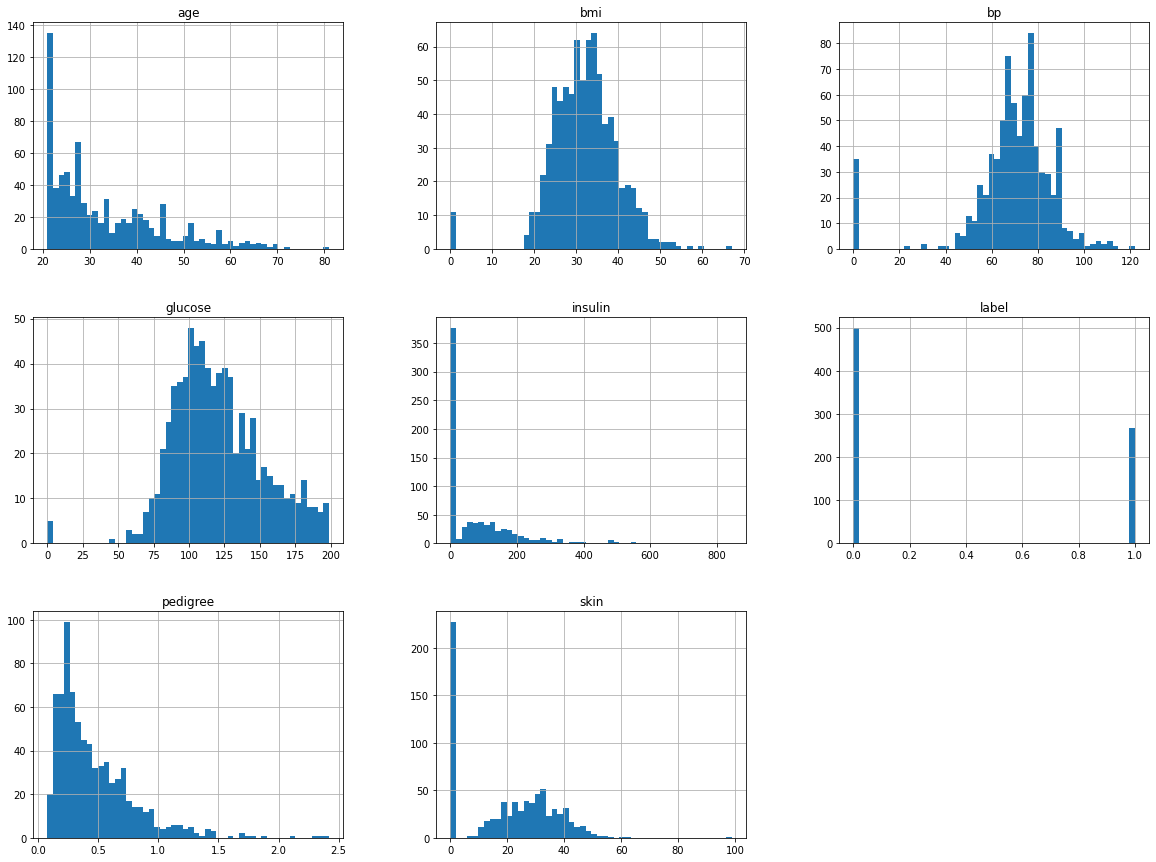

In [126]:
# inspect the data to understand it better: the distribution of values, any outliers, any missing values, etc.
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20, 15))
plt.show()

In [127]:
# sanitize the data

# Calculate the median value for bmi
median_bmi = dataset['bmi'].median()
# Substitute it in the BMI column of the
# dataset where values are 0
dataset['bmi'] = dataset['bmi'].replace(
    to_replace=0, value=median_bmi)

# Calculate the median value for bp
median_bp = dataset['bp'].median()
# Substitute it in the bp column of the
# dataset where values are 0
dataset['bp'] = dataset['bp'].replace(
    to_replace=0, value=median_bp)

# Calculate the median value for glucose
median_glucose = dataset['glucose'].median()
# Substitute it in the glucose column of the
# dataset where values are 0
dataset['glucose'] = dataset['glucose'].replace(
    to_replace=0, value=median_glucose)

# Calculate the median value for skin
median_skin = dataset['skin'].median()
# Substitute it in the skin column of the
# dataset where values are 0
dataset['skin'] = dataset['skin'].replace(
    to_replace=0, value=median_skin)

# Calculate the median value for insulin
median_insulin = dataset['insulin'].median()
# Substitute it in the insulin column of the
# dataset where values are 0
dataset['insulin'] = dataset['insulin'].replace(
    to_replace=0, value=median_insulin)

In [128]:
# Split the dataset into train/test subsests following a 80% - 20% split
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(
    dataset, test_size=0.2, random_state=42)

In [129]:
# Separate labels from the rest of the dataset
train_set_labels = train_set["label"].copy()
train_set = train_set.drop("label", axis=1)

test_set_labels = test_set["label"].copy()
test_set = test_set.drop("label", axis=1)

In [130]:
# feature scaling is needed to bring all predictors into comparable value scales
from sklearn.preprocessing import MinMaxScaler as Scaler

scaler = Scaler()
scaler.fit(train_set)
train_set_scaled = scaler.transform(train_set)
test_set_scaled = scaler.transform(test_set)

# inspect scaled values
scaledTrainingDataset = pd.DataFrame(data=train_set_scaled)
scaledTrainingDataset.head()

,0,1,2,3,4,5,6,7
0,0.117647,0.258065,0.489796,0.272727,0.019832,0.282209,0.096499,0.000000
1,0.529412,0.438710,0.591837,0.290909,0.019832,0.204499,0.514091,0.483333
2,0.058824,0.612903,0.224490,0.200000,0.082933,0.214724,0.245944,0.016667
3,0.000000,0.754839,0.265306,0.272727,0.019832,0.075665,0.075149,0.733333
4,0.352941,0.580645,0.571429,0.527273,0.427885,0.572597,0.068318,0.416667


In [131]:
# Training a Logistic Regression model
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(train_set_scaled,train_set_labels)

#
test_set_predictedLabels = logreg.predict(test_set_scaled)

In [132]:
# inspect performance
# Performance can be assessed using the confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_set_predictedLabels, test_set_labels)
cnf_matrix

array([[85, 22],
       [14, 33]])

In [133]:
# Print accuracy, precision, and recall
print("Accuracy:",metrics.accuracy_score(test_set_labels, test_set_predictedLabels))
print("Precision:",metrics.precision_score(test_set_labels, test_set_predictedLabels))
print("Recall:",metrics.recall_score(test_set_labels, test_set_predictedLabels))

Accuracy: 0.7662337662337663
Precision: 0.7021276595744681
Recall: 0.6


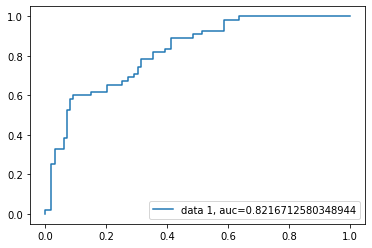

In [134]:
# generate the ROC curve
test_predicted_proba = logreg.predict_proba(test_set_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_set_labels,  test_predicted_proba)
auc = metrics.roc_auc_score(test_set_labels, test_predicted_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [135]:
# make a prediction oa new instance

# We create a new instance for, say, a particular new patient
new_instance = pd.DataFrame([[6, 168, 72, 35, 0, 43.6, 0.627, 65]])
# We scale those values like the others
new_instance_scaled = scaler.transform(new_instance)
# We predict the outcome
prediction = logreg.predict(new_instance_scaled)
# A value of "1" means that this person is likley to have type 2 diabetes
prediction

array([1.])